In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# LOAD THE CSV FILE

data = pd.read_csv("/content/ADANIPORTS.csv")

In [3]:
# MAKE DATAFRAME

df = pd.DataFrame(data)

In [4]:
# SAMPLE DATA

df.sample(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2874,10-07-2019,ADANIPORTS,EQ,405.00,406.95,408.8,402.35,404.40,405.00,405.36,2023029,8.200000e+13,33873.0,490305,0.2424
238,14-11-2008,MUNDRAPORT,EQ,339.55,342.20,351.0,320.00,322.00,322.85,330.72,132990,4.400000e+12,NaN,54721,0.4115
185,26-08-2008,MUNDRAPORT,EQ,582.20,575.25,578.0,566.00,567.50,568.65,570.06,205317,1.170000e+13,NaN,71700,0.3492
483,19-11-2009,MUNDRAPORT,EQ,534.30,534.30,544.0,533.35,538.50,539.15,538.86,130250,7.020000e+12,NaN,76581,0.5880
2983,20-12-2019,ADANIPORTS,EQ,369.65,370.20,378.0,370.20,371.65,372.30,374.72,10808900,4.050000e+14,114910.0,5443054,0.5036


In [5]:
# SHAPE OF CSV FILE(ROW, COLUMN)

df.shape

(3322, 15)

In [6]:
# INFORMATION OF OUR DATA(DATATYPE, NULL VALUE)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [7]:
# CHECK MISSING VALUE IS THERE OR NOT?

df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [8]:
# COLUMN OF OUR DATA

print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [9]:
# CONVERT DATE COLUMN TO DATETIME FORMAT
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# EXTRACT DAY, MONTH, AND YEAR
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# ADD A COLUMN FOR MONTH NAME
df['Month_name'] = df['Date'].dt.strftime('%B')
df['Day_name'] = df['Date'].dt.strftime('%A')

# DISPLAY THE UPDATED DATAFRAME
print(df)


           Date      Symbol Series  Prev Close    Open     High     Low  \
0    2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1    2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2    2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3    2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4    2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
...         ...         ...    ...         ...     ...      ...     ...   
3317 2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
3318 2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
3319 2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
3320 2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
3321 2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   

       Last   Close    VWAP    Volume      Turnover    Trades  \
0     959.0  962.90  984.72  27294

In [10]:
# DROP THE DATE COLUMN
df.drop(columns=['Date','Series','Prev Close','Last'], inplace=True)

print(df)

          Symbol    Open     High     Low   Close    VWAP    Volume  \
0     MUNDRAPORT  770.00  1050.00  770.00  962.90  984.72  27294366   
1     MUNDRAPORT  984.00   990.00  874.00  893.90  941.38   4581338   
2     MUNDRAPORT  909.00   914.75  841.00  884.20  888.09   5124121   
3     MUNDRAPORT  890.00   958.00  890.00  921.55  929.17   4609762   
4     MUNDRAPORT  939.75   995.00  922.00  969.30  965.65   2977470   
...          ...     ...      ...     ...     ...     ...       ...   
3317  ADANIPORTS  733.00   739.65  728.90  730.75  733.25   9390549   
3318  ADANIPORTS  735.00   757.50  727.35  749.15  747.67  20573107   
3319  ADANIPORTS  755.00   760.00  741.10  746.25  751.02  11156977   
3320  ADANIPORTS  753.20   765.85  743.40  746.75  753.06  13851910   
3321  ADANIPORTS  739.00   759.45  724.50  730.05  743.35  12600934   

          Turnover    Trades  Deliverable Volume  %Deliverble  Day  Month  \
0     2.690000e+15       NaN             9859619       0.3612   27    

In [11]:
# FILL THE MISSING VALUE IN THE TRADES COLUMN WITH ZEROS

df_updated = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_updated['Trades'].fillna(0, inplace=True)

# DISPLAY df_updated
print(df_updated.head())


       Symbol    Open     High    Low   Close    VWAP    Volume      Turnover  \
0  MUNDRAPORT  770.00  1050.00  770.0  962.90  984.72  27294366  2.690000e+15   
1  MUNDRAPORT  984.00   990.00  874.0  893.90  941.38   4581338  4.310000e+14   
2  MUNDRAPORT  909.00   914.75  841.0  884.20  888.09   5124121  4.550000e+14   
3  MUNDRAPORT  890.00   958.00  890.0  921.55  929.17   4609762  4.280000e+14   
4  MUNDRAPORT  939.75   995.00  922.0  969.30  965.65   2977470  2.880000e+14   

   Trades  Deliverable Volume  %Deliverble  Day  Month  Year Month_name  \
0     0.0             9859619       0.3612   27     11  2007   November   
1     0.0             1453278       0.3172   28     11  2007   November   
2     0.0             1069678       0.2088   29     11  2007   November   
3     0.0             1260913       0.2735   30     11  2007   November   
4     0.0              816123       0.2741    3     12  2007   December   

    Day_name  
0    Tuesday  
1  Wednesday  
2   Thursday  
3 

In [12]:
# CHECK MISSING VALUE IS THERE OR NOT?

df_updated.isnull().sum()

Symbol                0
Open                  0
High                  0
Low                   0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Day                   0
Month                 0
Year                  0
Month_name            0
Day_name              0
dtype: int64

In [13]:
# STATISTICAL ANALYSIS

df_updated.describe()

,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,Month,Year
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3322.000000,3322.000000,3322.000000,3322.000000
mean,344.763019,351.608007,337.531969,344.201626,344.853182,2.954564e+06,1.070087e+14,3.321188e+04,1.207441e+06,0.445899,15.785069,6.442505,2014.124624
std,193.619992,198.617808,188.676614,193.045886,193.841305,4.104227e+06,2.625275e+14,4.747918e+04,1.398640e+06,0.160496,8.785691,3.483325,3.881581
min,108.000000,110.450000,105.650000,108.000000,108.340000,1.236600e+04,2.420000e+11,0.000000e+00,5.383000e+03,0.067000,1.000000,1.000000,2007.000000
25%,164.850000,168.000000,161.600000,164.312500,164.855000,7.493682e+05,1.820000e+13,0.000000e+00,3.212005e+05,0.332900,8.000000,3.000000,2011.000000
50%,325.750000,331.275000,319.850000,324.700000,325.765000,2.007292e+06,5.840000e+13,2.555850e+04,8.132775e+05,0.445650,16.000000,6.000000,2014.000000
75%,401.000000,407.187500,395.000000,400.912500,400.607500,3.636883e+06,1.160000e+14,4.585475e+04,1.605528e+06,0.555850,23.000000,9.000000,2017.000000
max,1310.250000,1324.000000,1270.000000,1307.450000,1302.150000,9.771788e+07,8.160000e+15,1.205984e+06,2.241652e+07,0.979800,31.000000,12.000000,2021.000000


In [14]:
# CHECK ANY DUPLICATE VALUE IS THERE OR NOT?

df_updated.duplicated().sum()

0

In [15]:
# SELECT ONLY NUMERIC COLUMN

df_updated_numerical = df.select_dtypes(include=["int64", "float64"])

In [16]:
# CORRELATION BETWEEN NUMERICAL COLUMN

df_updated_numerical.corr()

,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Open,1.000000,0.998697,0.998741,0.997934,0.998748,0.060509,0.225124,0.566414,-0.135827,-0.249195
High,0.998697,1.000000,0.997991,0.999058,0.999504,0.068102,0.233584,0.581243,-0.131160,-0.254316
Low,0.998741,0.997991,1.000000,0.998904,0.999184,0.058525,0.223257,0.555585,-0.136498,-0.249176
Close,0.997934,0.999058,0.998904,1.000000,0.999682,0.066464,0.231243,0.569296,-0.131466,-0.253569
VWAP,0.998748,0.999504,0.999184,0.999682,1.000000,0.064443,0.229875,0.569272,-0.133324,-0.253705
Volume,0.060509,0.068102,0.058525,0.066464,0.064443,1.000000,0.907892,0.936381,0.702409,-0.166870
Turnover,0.225124,0.233584,0.223257,0.231243,0.229875,0.907892,1.000000,0.940248,0.428945,-0.229967
Trades,0.566414,0.581243,0.555585,0.569296,0.569272,0.936381,0.940248,1.000000,0.478165,-0.288974
Deliverable Volume,-0.135827,-0.131160,-0.136498,-0.131466,-0.133324,0.702409,0.428945,0.478165,1.000000,0.275753
%Deliverble,-0.249195,-0.254316,-0.249176,-0.253569,-0.253705,-0.166870,-0.229967,-0.288974,0.275753,1.000000


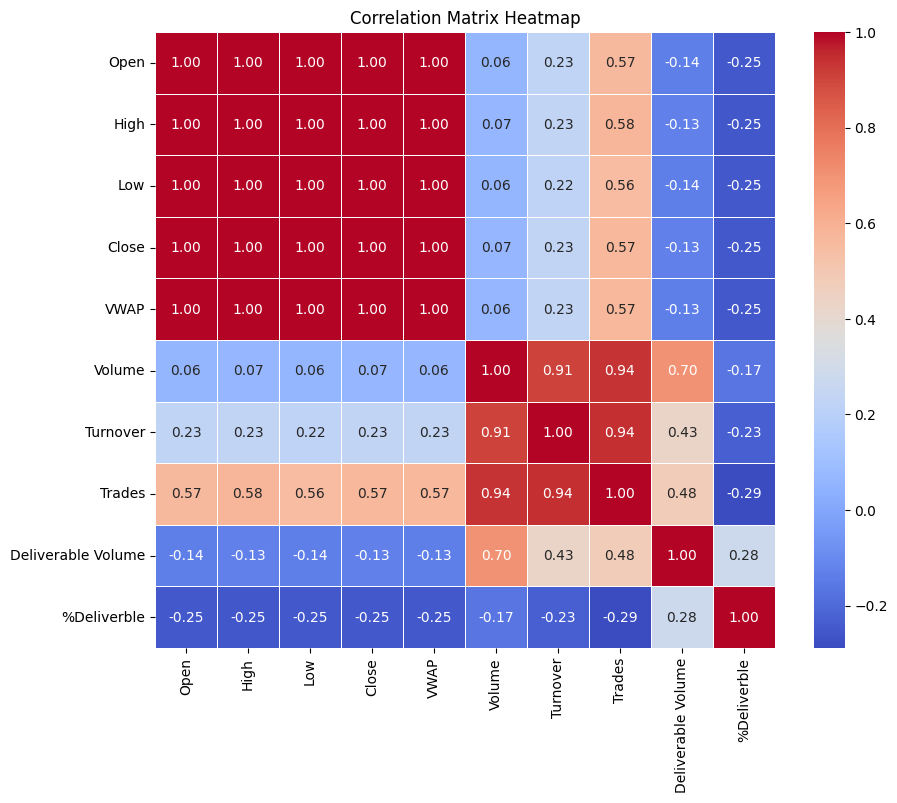

In [17]:
# CALCULATE THE CORRELATION MATRIX
correlation_matrix = df_updated_numerical.corr()

# CREATE A HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# SET TITLE AND ADJUST PLOT PARAMETERS
plt.title('Correlation Matrix Heatmap')
plt.yticks(rotation=0)  # Rotate y-axis labels to horizontal

# DISPLAY THE HEATMAP
plt.show()


In [18]:
# MAKE A COPY OF IT AND STORE IT IN A NEW VARIABLE

df_new = df_updated.copy()
df_new

,Symbol,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day,Month,Year,Month_name,Day_name
0,MUNDRAPORT,770.00,1050.00,770.00,962.90,984.72,27294366,2.690000e+15,0.0,9859619,0.3612,27,11,2007,November,Tuesday
1,MUNDRAPORT,984.00,990.00,874.00,893.90,941.38,4581338,4.310000e+14,0.0,1453278,0.3172,28,11,2007,November,Wednesday
2,MUNDRAPORT,909.00,914.75,841.00,884.20,888.09,5124121,4.550000e+14,0.0,1069678,0.2088,29,11,2007,November,Thursday
3,MUNDRAPORT,890.00,958.00,890.00,921.55,929.17,4609762,4.280000e+14,0.0,1260913,0.2735,30,11,2007,November,Friday
4,MUNDRAPORT,939.75,995.00,922.00,969.30,965.65,2977470,2.880000e+14,0.0,816123,0.2741,3,12,2007,December,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,ADANIPORTS,733.00,739.65,728.90,730.75,733.25,9390549,6.890000e+14,116457.0,838079,0.0892,26,4,2021,April,Monday
3318,ADANIPORTS,735.00,757.50,727.35,749.15,747.67,20573107,1.540000e+15,236896.0,1779639,0.0865,27,4,2021,April,Tuesday
3319,ADANIPORTS,755.00,760.00,741.10,746.25,751.02,11156977,8.380000e+14,130847.0,1342353,0.1203,28,4,2021,April,Wednesday
3320,ADANIPORTS,753.20,765.85,743.40,746.75,753.06,13851910,1.040000e+15,153293.0,1304895,0.0942,29,4,2021,April,Thursday


array([<Axes: title={'center': 'ADANIPORTS'}>,
       <Axes: title={'center': 'MUNDRAPORT'}>], dtype=object)

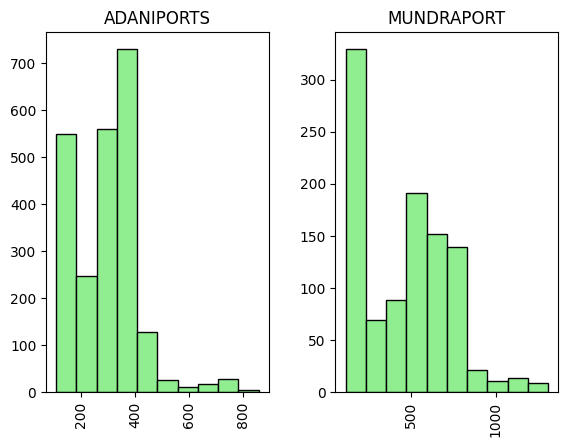

In [19]:
# DISTRIBUTION OF STOKE PRICES BY COMPANY

df_new.hist(column='Open', by='Symbol', color = 'lightgreen', edgecolor = 'black')

Text(0, 0.5, 'Average Open price')

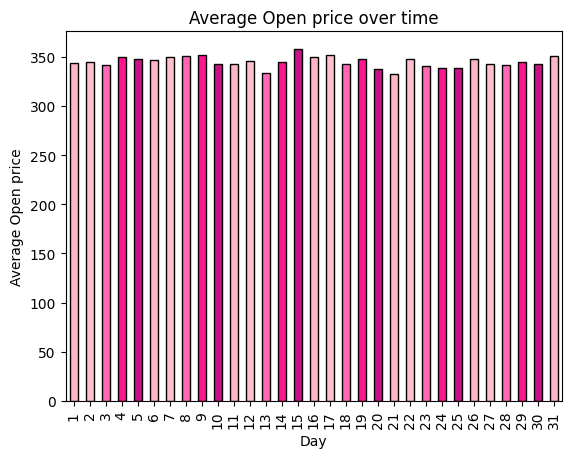

In [20]:
# AVERAGE OPEN PRICE OVER TIME

# Create a list of colors
colors = ['lightpink','pink','hotpink','deeppink','mediumvioletred']

plt.figure()
plt.title('Average Open price over time')
df_new.groupby('Day')['Open'].mean().plot(kind='bar', color=colors, edgecolor = 'black')
plt.xlabel('Day')
plt.ylabel('Average Open price')

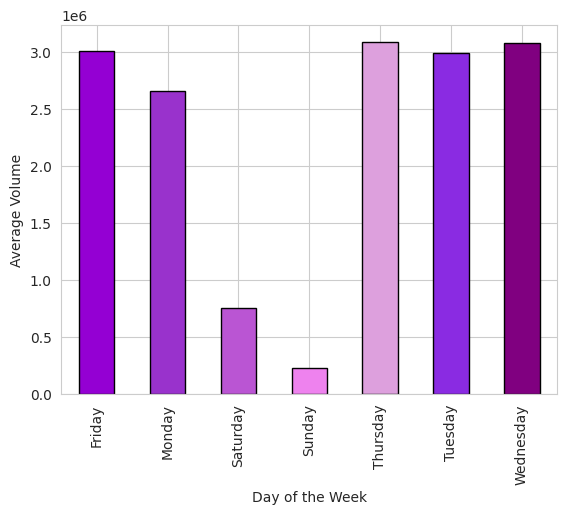

In [122]:
# AVERAGE VOLUME DURING THE DAY

# Define the colors for the bars
colors = ['darkviolet', 'darkorchid', 'mediumorchid', 'violet', 'plum', 'blueviolet', 'purple']

# Group by 'Day_name' and calculate the mean volume, then plot
df_new.groupby('Day_name')['Volume'].mean().plot(kind='bar', color=colors, edgecolor='black')

# Add X and Y axis labels
plt.xlabel('Day of the Week')
plt.ylabel('Average Volume')

# Add legend
day_names = df_new['Day_name'].unique()

# Show plot
plt.show()


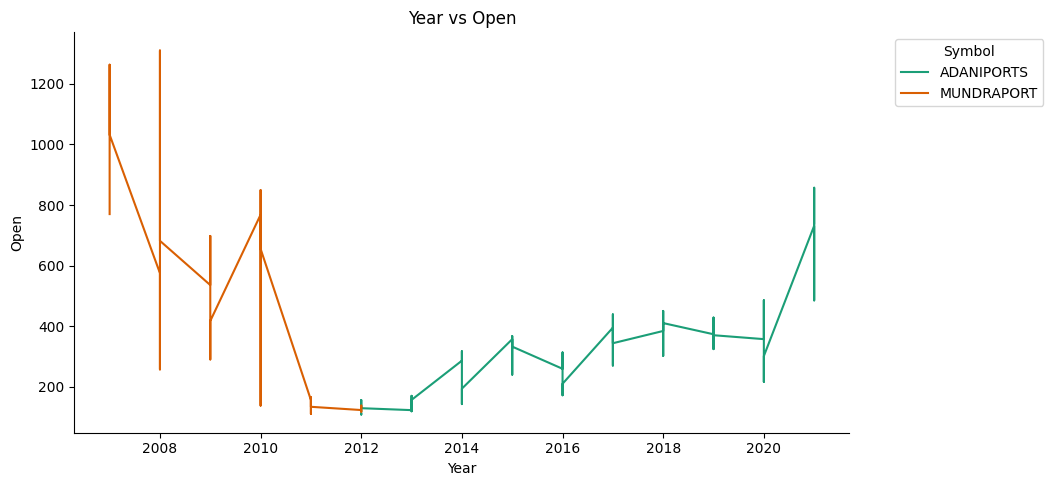

In [22]:
# YEAR WISE OPEN STOKE PRICE OF ADANI AND MUNDRA PORT

def plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Open']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

plt.figure(figsize=(10, 5.2))
df_sorted = df_new.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Symbol')):
    plot_series(series, series_name, i)

plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Open')
plt.title('Year vs Open')
sns.despine()
plt.show()


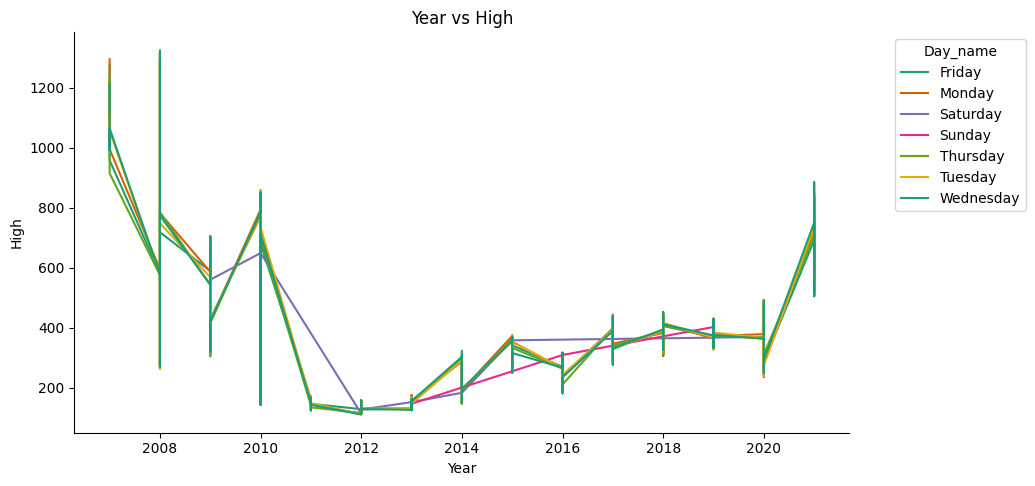

In [23]:
# YEAR WISE HIGH STOKE PRICE OF ADANI AND MUNDRA PORT

def plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['High']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

plt.figure(figsize=(10, 5.2))
df_sorted = df_new.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day_name')):
    plot_series(series, series_name, i)

plt.legend(title='Day_name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('High')
plt.title('Year vs High')
sns.despine()
plt.show()


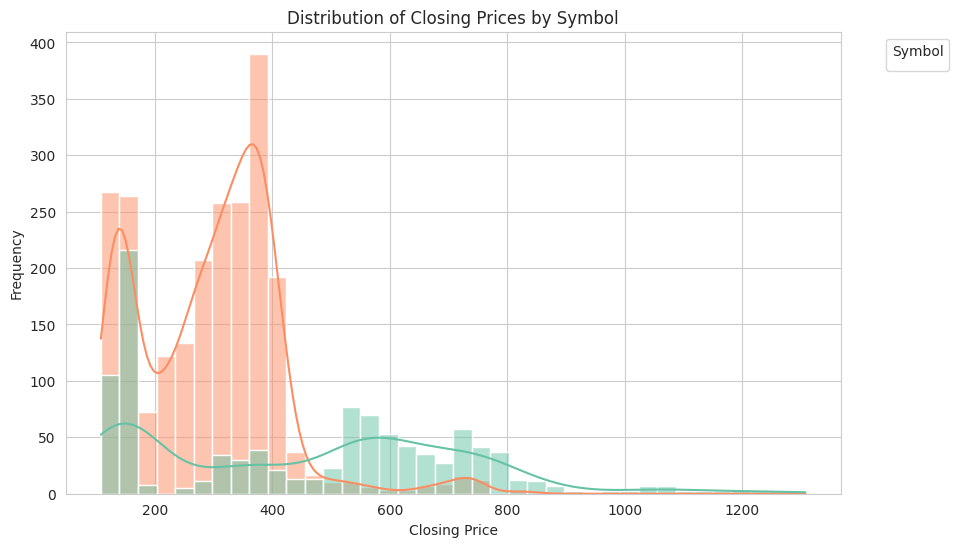

In [24]:
# DISTRIBUTION OF CLOSING PRICES BY SYMBOL

# Set the style for the plot
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(x="Close", hue="Symbol", data=df_new, palette="Set2", kde=True)

# Set labels and title
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices by Symbol')

# Show plot
plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


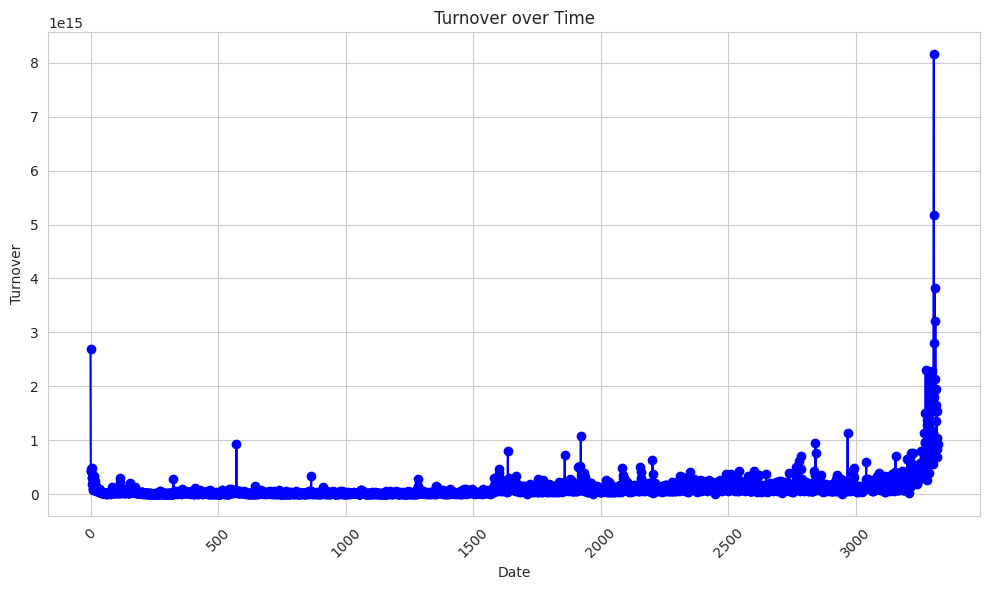

In [25]:
# TURNOVER OVER TIME

# Plot the 'Turnover' column
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Turnover'], marker='o', color='blue', linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.title('Turnover over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

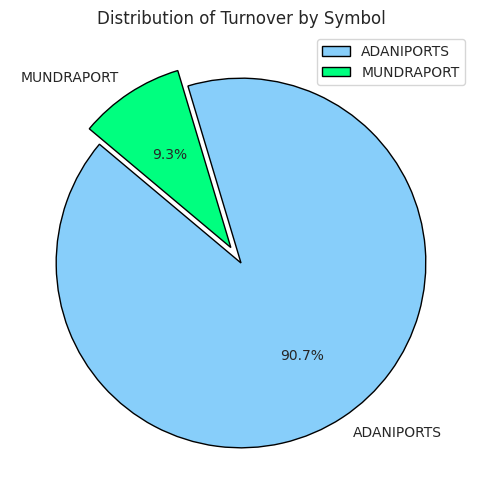

In [26]:
# DISTRIBUTION OF TURNOVER BY SYMBOL

# Grouping the data by 'Symbol' and summing up the 'Turnover' for each symbol
symbol_turnover = df_new.groupby('Symbol')['Turnover'].sum()
color = ['lightskyblue','springgreen']

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(symbol_turnover, labels=symbol_turnover.index, autopct='%1.1f%%', startangle=140, explode = [0,0.1], colors = color,  wedgeprops={'edgecolor': 'black'})
plt.legend(loc='upper right', labels=symbol_turnover.index)
plt.title('Distribution of Turnover by Symbol')
plt.show()


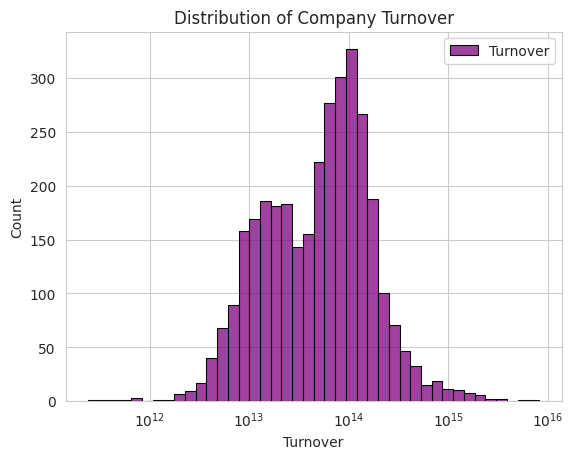

In [123]:
# DISTRIBUTION OF COMPANY TURNOVER

# Plot the histogram with log scale
sns.histplot(df_new.Turnover, log_scale=True, color='purple', edgecolor='black')

# Add legend
plt.legend(labels=['Turnover'])

# Add title
plt.title('Distribution of Company Turnover')

# Show plot
plt.show()


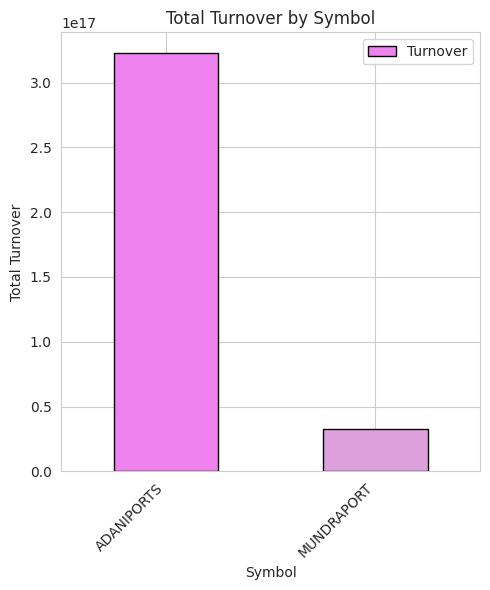

In [27]:
# TOTAL TURNOVER BY SYMBOL

# Grouping the data by 'Symbol' and calculating the total turnover for each symbol
turnover_by_symbol = df_new.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(5, 6))
turnover_by_symbol.plot(kind='bar', color=['violet','plum'], edgecolor = 'black')

# Adding labels and title
plt.xlabel('Symbol')
plt.ylabel('Total Turnover')
plt.title('Total Turnover by Symbol')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


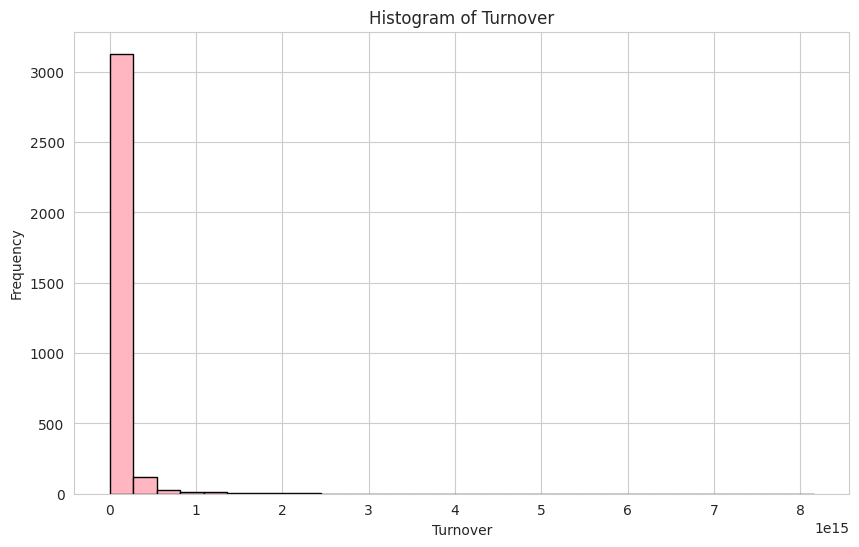

In [28]:
# HISTOGRAM OF TURNOVER

# Create histogram for 'Turnover'
plt.figure(figsize=(10, 6))
plt.hist(df_new['Turnover'], bins=30, color='lightpink', edgecolor='black')

# Add labels and title
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.title('Histogram of Turnover')

# Show plot
plt.show()

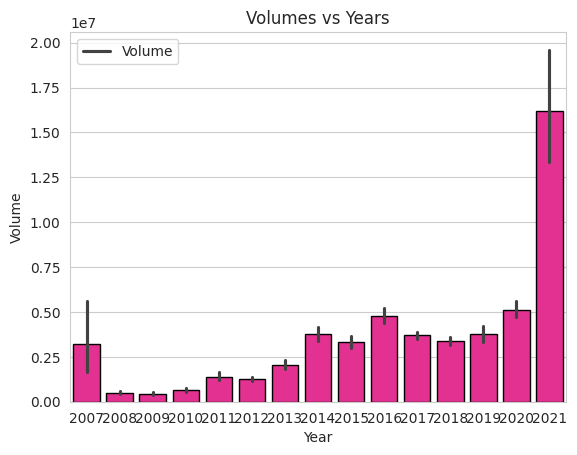

In [124]:
# VOLUME VS YEAR BAR CHART

sns.barplot(x = df_new.Year, y = df_new.Volume, color = 'deeppink', edgecolor = 'black')

# Add legend and title
plt.legend(labels=['Volume'])
plt.title('Volumes vs Years')

# Show plot
plt.show()

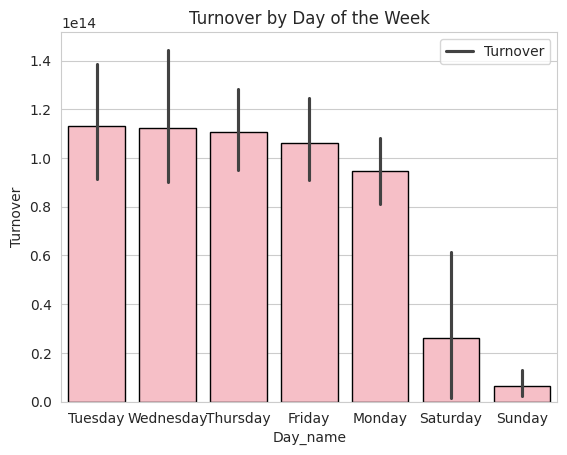

In [125]:
# TURNOVER BY DAY OF THE WEEK

sns.barplot(x = df_new.Day_name, y = df_new.Turnover, color = 'lightpink', edgecolor = 'black')

# Add legend and title
plt.legend(labels=['Turnover'])  # Legend with a single label
plt.title('Turnover by Day of the Week')  # Title for the plot

# Show the plot
plt.show()

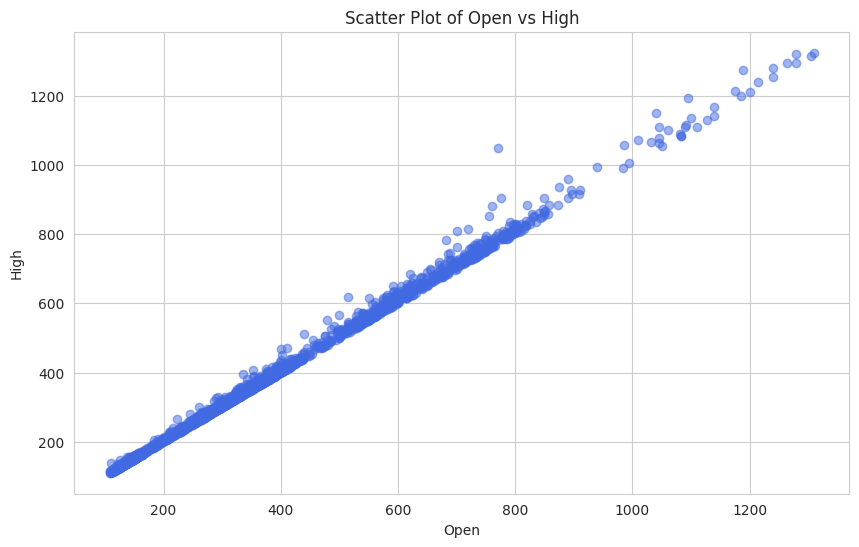

In [29]:
# SCATTER PLOT OF OPEN VS HIGH

# Plotting the scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(df_new['Open'], df_new['High'], color='royalblue', alpha=0.5)

# Adding labels and title
plt.xlabel('Open')
plt.ylabel('High')
plt.title('Scatter Plot of Open vs High')

# Show plot
plt.show()


In [30]:
# SELECTING 'YEAR' AND 'VWAP' COLUMNS
df_vwap = df_new[['Year', 'VWAP']].copy()
df_vwap

,Year,VWAP
0,2007,984.72
1,2007,941.38
2,2007,888.09
3,2007,929.17
4,2007,965.65
...,...,...
3317,2021,733.25
3318,2021,747.67
3319,2021,751.02
3320,2021,753.06


<Axes: xlabel='VWAP', ylabel='Count'>

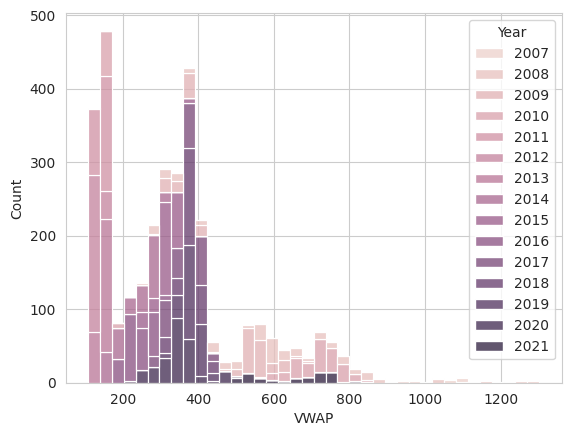

In [31]:
# VWAP DISTRIBUTION BY YEAR

sns.histplot(data=df_vwap, x="VWAP", hue="Year", multiple="stack")

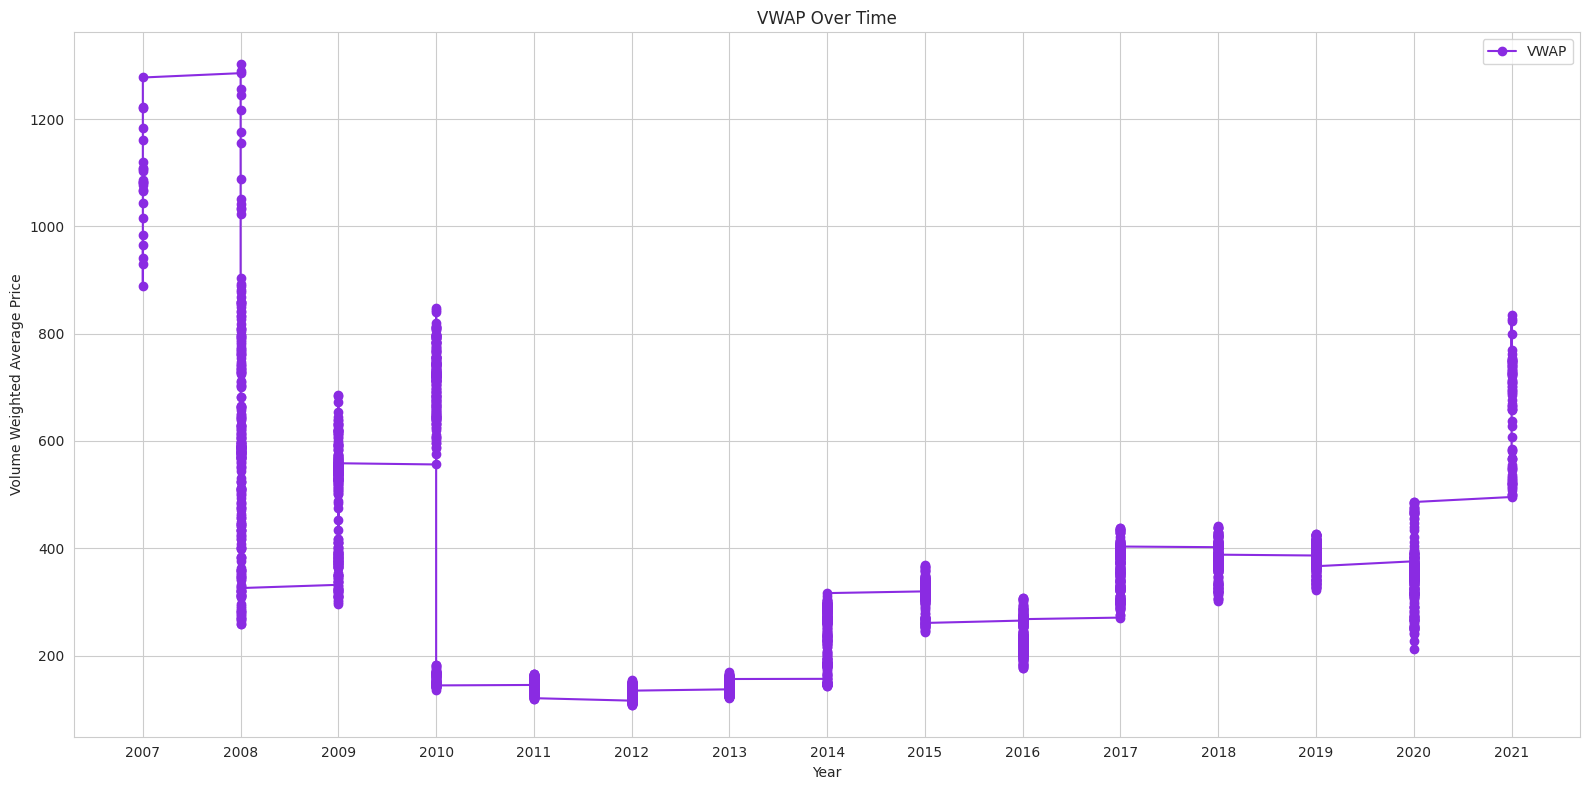

In [32]:
# VWAP OVER TIME

plt.figure(figsize=(16, 8))
plt.plot(df_vwap['Year'], df_vwap['VWAP'], label='VWAP', marker='o', linestyle='-', color='blueviolet')
plt.title('VWAP Over Time')
plt.xlabel('Year')
plt.ylabel('Volume Weighted Average Price')
plt.xticks(df_vwap['Year'].unique())  # Set x-axis ticks to display each unique year
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# SELECTING 'YEAR' AND 'DELIVERABLE VOLUME' COLUMNS

df_Deliverable_Volume = df_new[['Year', 'Deliverable Volume']].copy()
df_Deliverable_Volume

,Year,Deliverable Volume
0,2007,9859619
1,2007,1453278
2,2007,1069678
3,2007,1260913
4,2007,816123
...,...,...
3317,2021,838079
3318,2021,1779639
3319,2021,1342353
3320,2021,1304895


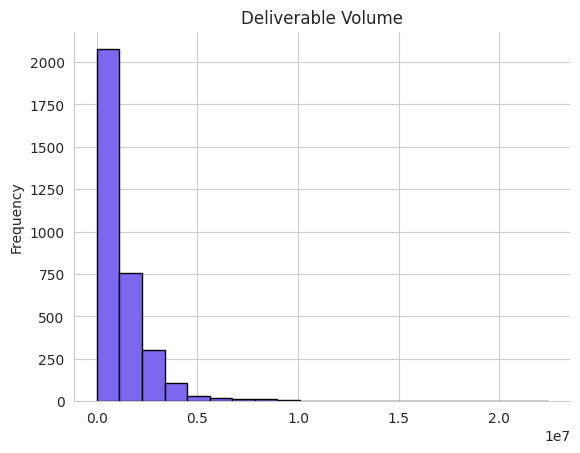

In [34]:
# DELIVERABLE VOLUME HISTOGRAM

df_Deliverable_Volume['Deliverable Volume'].plot(kind='hist', bins=20, title='Deliverable Volume', color ='mediumslateblue', edgecolor = 'black')
plt.gca().spines[['top', 'right',]].set_visible(False)

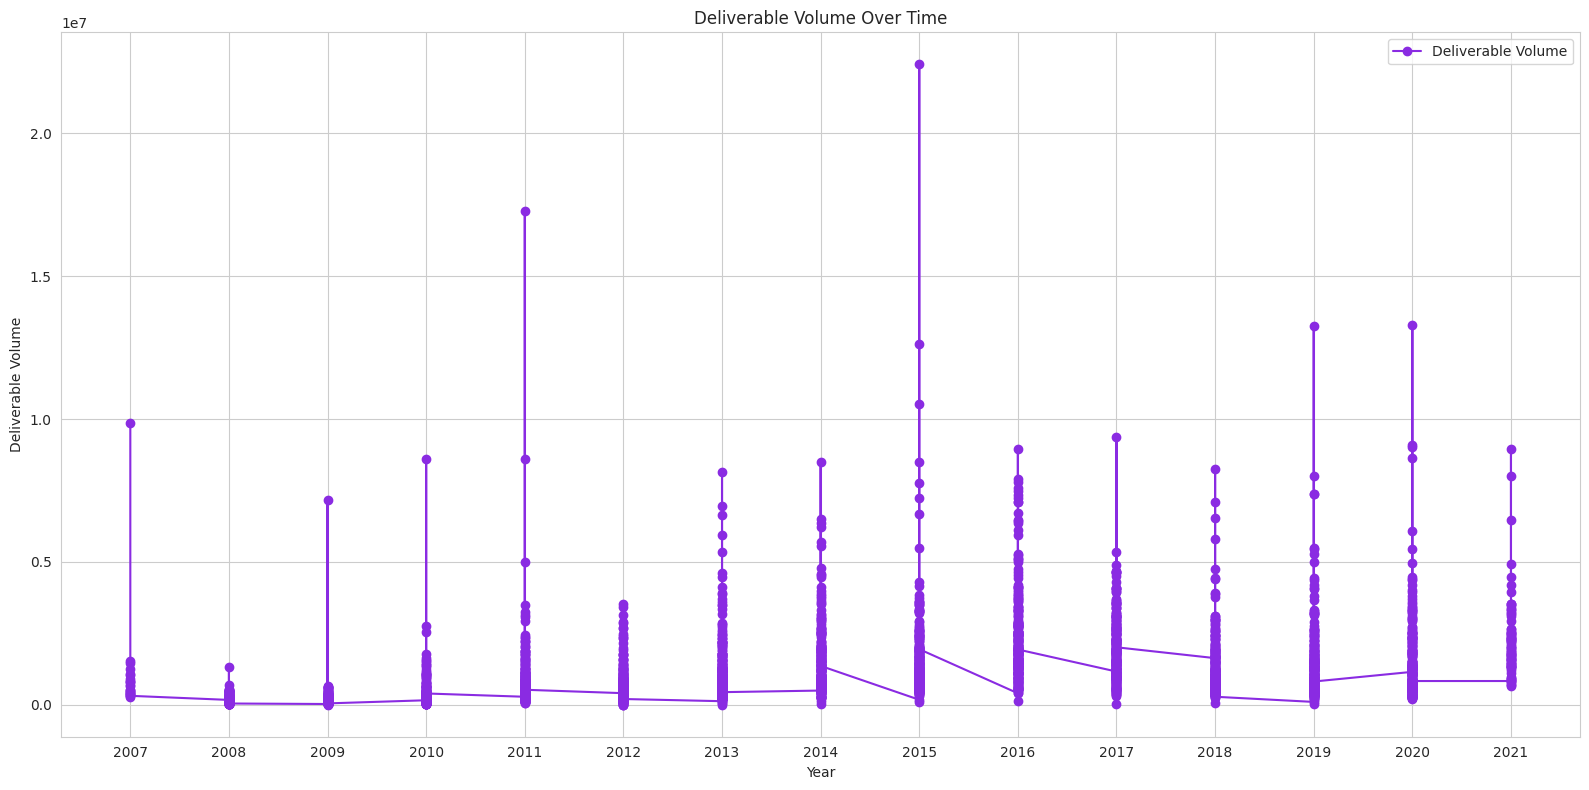

In [35]:
# VISUALIZING THE DELIVERABLE VOLUME OVER TIME

plt.figure(figsize=(16, 8))
plt.plot(df_Deliverable_Volume['Year'], df_Deliverable_Volume['Deliverable Volume'], label='Deliverable Volume', marker='o', linestyle='-', color='blueviolet')
plt.title('Deliverable Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Deliverable Volume')
plt.xticks(df_Deliverable_Volume['Year'].unique())  # Set x-axis ticks to display each unique year
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# SELECTING 'MONTH' AND 'DELIVERABLE VOLUME' COLUMN

df_Deliverable_Volume = df_new[['Month', 'Deliverable Volume']].copy()
df_Deliverable_Volume

,Month,Deliverable Volume
0,11,9859619
1,11,1453278
2,11,1069678
3,11,1260913
4,12,816123
...,...,...
3317,4,838079
3318,4,1779639
3319,4,1342353
3320,4,1304895


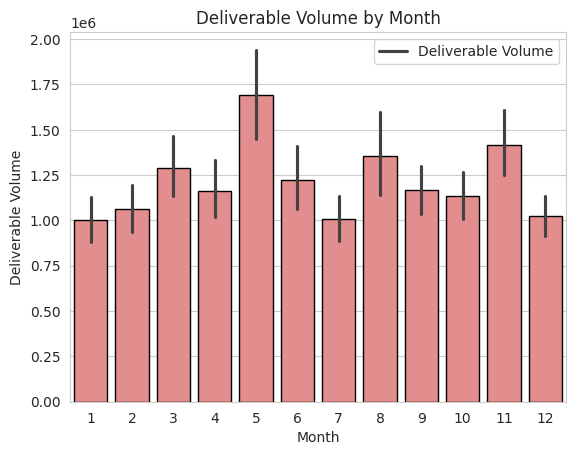

In [126]:
# DELIVERABLE VOLUME BY MONTH

sns.barplot(data=df_Deliverable_Volume, x="Month", y="Deliverable Volume", color = 'lightcoral', edgecolor = 'black')

# Add legend
plt.legend(labels=['Deliverable Volume'])

# Add title
plt.title('Deliverable Volume by Month')

# Show plot
plt.show()

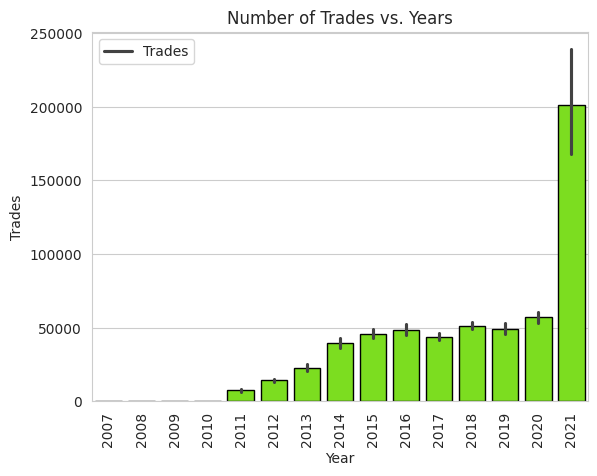

In [130]:
# NUMBER OF TRADES VS. YEAR BAR CHART

sns.barplot(x=df_new.Year,y=df_new.Trades, color = 'lawngreen', edgecolor = 'black')

# Add legend and title
plt.legend(labels=['Trades'])
plt.title('Number of Trades vs. Years')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Show plot
plt.show()


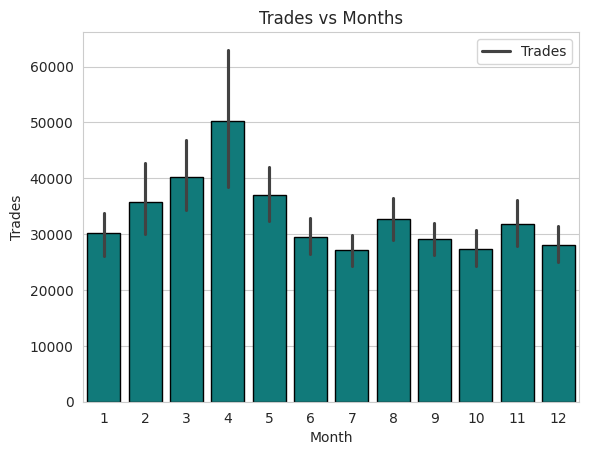

In [129]:
# TRADES VS MONTH BAR CHART

sns.barplot(x =df_new.Month,y = df_new.Trades, color = 'darkcyan', edgecolor = 'black')

# Add legend and title
plt.legend(labels=['Trades'])
plt.title('Trades vs Months')

# Show plot
plt.show()

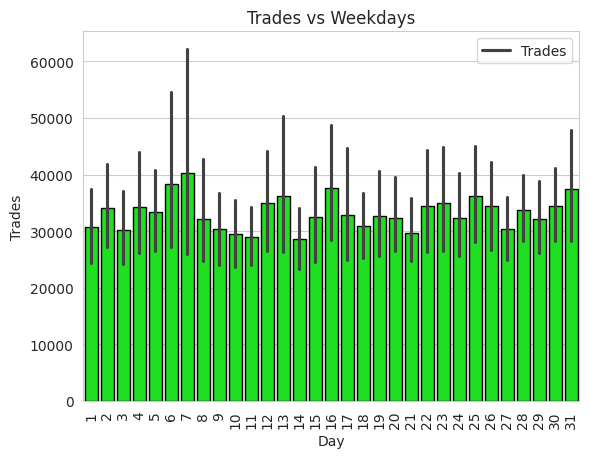

In [132]:
# TRADES VS WEEKDAYS BAR CHART

sns.barplot(x = df_new.Day,y =df_new.Trades,color = 'lime', edgecolor = 'black')

# Add title
plt.title('Trades vs Weekdays')

# Add legend
plt.legend(labels=['Trades'])

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Show plot
plt.show()

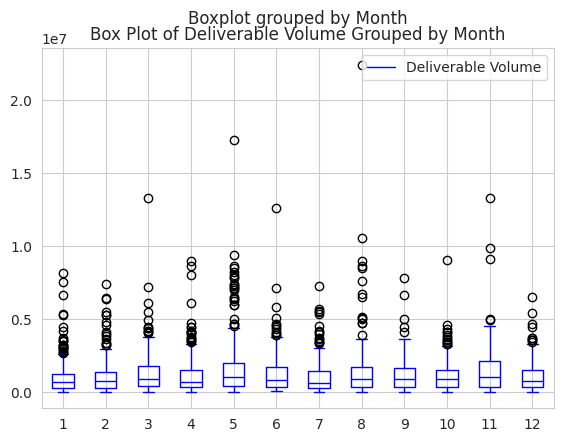

In [133]:
# BOX POT GROUPED BY MONTH DELIVERABLE VOLUME

df_Deliverable_Volume.boxplot(column='Deliverable Volume', by='Month', color = 'blue')

# Add title
plt.title('Box Plot of Deliverable Volume Grouped by Month')

# Add legend
plt.legend(labels=['Deliverable Volume'], loc='upper right')

# Remove automatic x-axis label
plt.xlabel('')

# Show plot
plt.show()

In [39]:
# SELECTING 'DAY' AND '%DELIVERABLE' COLUMNS

df_Deliverable = df_new[['Day', '%Deliverble']].copy()
df_Deliverable

,Day,%Deliverble
0,27,0.3612
1,28,0.3172
2,29,0.2088
3,30,0.2735
4,3,0.2741
...,...,...
3317,26,0.0892
3318,27,0.0865
3319,28,0.1203
3320,29,0.0942


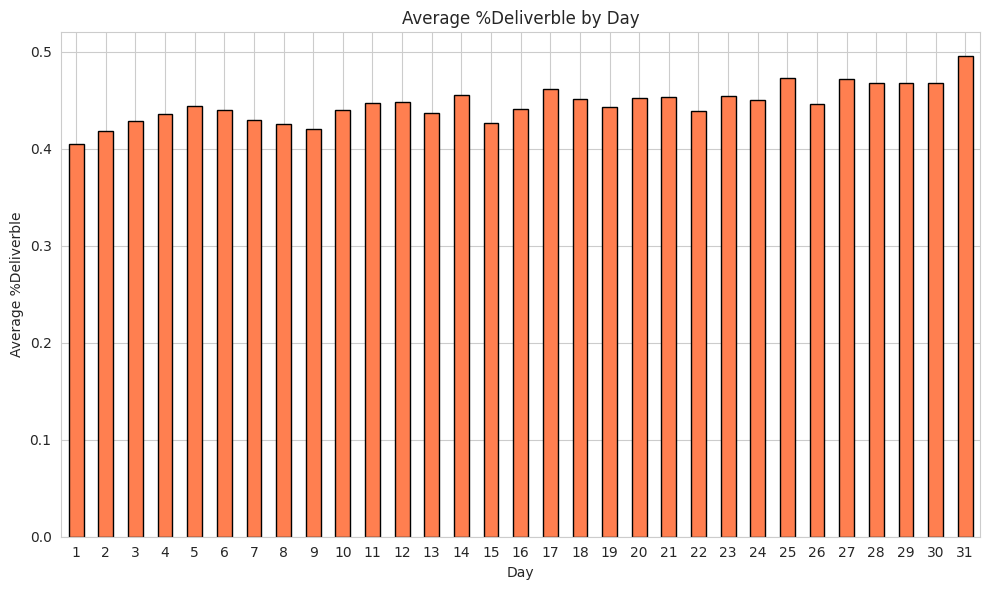

In [40]:
# BAR CHART OF AVERAGE %DELIVERBLE BY DAY

average_deliverble_by_day = df_Deliverable.groupby('Day')['%Deliverble'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_deliverble_by_day.plot(kind='bar', color='coral', edgecolor = 'black')  # Adjust color as needed
plt.title('Average %Deliverble by Day')
plt.xlabel('Day')
plt.ylabel('Average %Deliverble')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.tight_layout()
plt.show()


In [42]:
# SELECTED COLUMN FOR STANDARD SCALING

selected_col = ['Open',	'High',	'Low',	'Close',	'VWAP',	'Volume',	'Turnover',	'Trades',	'Deliverable Volume']
x = df_updated[selected_col]
x.head()

,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
0,770.00,1050.00,770.0,962.90,984.72,27294366,2.690000e+15,0.0,9859619
1,984.00,990.00,874.0,893.90,941.38,4581338,4.310000e+14,0.0,1453278
2,909.00,914.75,841.0,884.20,888.09,5124121,4.550000e+14,0.0,1069678
3,890.00,958.00,890.0,921.55,929.17,4609762,4.280000e+14,0.0,1260913
4,939.75,995.00,922.0,969.30,965.65,2977470,2.880000e+14,0.0,816123


In [43]:
# OUTPUT COLUMN

y = data['%Deliverble']

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
std_scaler = StandardScaler()

In [46]:
x_std = std_scaler.fit_transform(x)
x_std
x_std_df = pd.DataFrame(x_std)
x_std_df

,0,1,2,3,4,5,6,7,8
0,2.196576,3.516790,2.292458,3.205412,3.301480,5.931316,9.840418,-0.699609,6.187067
1,3.302000,3.214657,2.843748,2.847930,3.077861,0.396425,1.234309,-0.699609,0.175795
2,2.914585,2.835731,2.668819,2.797675,2.802904,0.528695,1.325742,-0.699609,-0.098513
3,2.816440,3.053519,2.928562,2.991182,3.014862,0.403352,1.222880,-0.699609,0.038237
4,3.073425,3.239835,3.098190,3.238569,3.203086,0.005582,0.689522,-0.699609,-0.279827
...,...,...,...,...,...,...,...,...,...
3317,2.005451,1.954006,2.074592,2.002667,2.003986,1.568372,2.217211,1.753561,-0.264126
3318,2.015782,2.043891,2.066375,2.097995,2.078388,4.293426,5.459265,4.290613,0.409172
3319,2.119093,2.056480,2.139262,2.082971,2.095673,1.998829,2.784856,2.056687,0.096474
3320,2.109795,2.085938,2.151454,2.085561,2.106199,2.655552,3.554415,2.529513,0.069688


In [47]:
# RENAME OF STANDARD SCALING COLUMN

new_columns = ['A', 'B', 'C','D','E','F','G','H','I']
x_std_df.columns = new_columns
x_std_df.rename(columns={'A': 'Open', 'B': 'High', 'C': 'Low','D': 'Close','E': 'VWAP','F': 'Volume','G': 'Turnover','H': 'Trades','I': 'Deliverable Volume'}, inplace=True)
x_std_df

,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
0,2.196576,3.516790,2.292458,3.205412,3.301480,5.931316,9.840418,-0.699609,6.187067
1,3.302000,3.214657,2.843748,2.847930,3.077861,0.396425,1.234309,-0.699609,0.175795
2,2.914585,2.835731,2.668819,2.797675,2.802904,0.528695,1.325742,-0.699609,-0.098513
3,2.816440,3.053519,2.928562,2.991182,3.014862,0.403352,1.222880,-0.699609,0.038237
4,3.073425,3.239835,3.098190,3.238569,3.203086,0.005582,0.689522,-0.699609,-0.279827
...,...,...,...,...,...,...,...,...,...
3317,2.005451,1.954006,2.074592,2.002667,2.003986,1.568372,2.217211,1.753561,-0.264126
3318,2.015782,2.043891,2.066375,2.097995,2.078388,4.293426,5.459265,4.290613,0.409172
3319,2.119093,2.056480,2.139262,2.082971,2.095673,1.998829,2.784856,2.056687,0.096474
3320,2.109795,2.085938,2.151454,2.085561,2.106199,2.655552,3.554415,2.529513,0.069688


In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
# SELECTED COLUMN FOR ONE HOT ENCODING

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df_new[['Symbol','Day_name','Month_name']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
encoded_categories = encoder.get_feature_names_out(['Symbol','Day_name','Month_name'])

In [51]:
encoded_df = pd.DataFrame(encoded_features, columns=encoded_categories)
encoded_df

,Symbol_ADANIPORTS,Symbol_MUNDRAPORT,Day_name_Friday,Day_name_Monday,Day_name_Saturday,Day_name_Sunday,Day_name_Thursday,Day_name_Tuesday,Day_name_Wednesday,Month_name_April,...,Month_name_December,Month_name_February,Month_name_January,Month_name_July,Month_name_June,Month_name_March,Month_name_May,Month_name_November,Month_name_October,Month_name_September
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3318,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3320,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# MERGE TWO TYPE OF DIFFERENT COLUMN. ONE OF ONE HOT ENCODED AND ANOTHER ONE ID STANDARD SCALER COLUMN

df_encoded = pd.concat([x_std_df, encoded_df], axis = 1)
df_encoded

,Open,High,Low,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,Symbol_ADANIPORTS,...,Month_name_December,Month_name_February,Month_name_January,Month_name_July,Month_name_June,Month_name_March,Month_name_May,Month_name_November,Month_name_October,Month_name_September
0,2.196576,3.516790,2.292458,3.205412,3.301480,5.931316,9.840418,-0.699609,6.187067,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.302000,3.214657,2.843748,2.847930,3.077861,0.396425,1.234309,-0.699609,0.175795,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.914585,2.835731,2.668819,2.797675,2.802904,0.528695,1.325742,-0.699609,-0.098513,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.816440,3.053519,2.928562,2.991182,3.014862,0.403352,1.222880,-0.699609,0.038237,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.073425,3.239835,3.098190,3.238569,3.203086,0.005582,0.689522,-0.699609,-0.279827,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2.005451,1.954006,2.074592,2.002667,2.003986,1.568372,2.217211,1.753561,-0.264126,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3318,2.015782,2.043891,2.066375,2.097995,2.078388,4.293426,5.459265,4.290613,0.409172,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3319,2.119093,2.056480,2.139262,2.082971,2.095673,1.998829,2.784856,2.056687,0.096474,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3320,2.109795,2.085938,2.151454,2.085561,2.106199,2.655552,3.554415,2.529513,0.069688,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
print(df_encoded.shape)

(3322, 30)


In [54]:
# SPLIT THE DATA IN TRAIN AND TEST

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_encoded, y, test_size = 0.2)

In [55]:
x_train.shape, x_test.shape

((2657, 30), (665, 30))

In [56]:
# DISPLAY ROW AND COLUMN OF TRAIN AND TEST DATA

x_train.shape, x_test.shape
print("-------TRAIN DATA-------")
print(f"Number of rows in train data= {x_train.shape[0]}")
print(f"Number of columns in train data= {x_train.shape[1]}")
print("-------TEST DATA-------")
print(f"Number of rows in test data= {x_test.shape[0]}")
print(f"Number of columns in test data= {x_test.shape[1]}")

-------TRAIN DATA-------
Number of rows in train data= 2657
Number of columns in train data= 30
-------TEST DATA-------
Number of rows in test data= 665
Number of columns in test data= 30


**LINEAR REGRESSION MODEL**

In [57]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [58]:
pred1=lr_model.predict(x_test)

In [59]:
lr_model1=r2_score(y_test,pred1)
print("R-squared:",lr_model1)

R-squared: 0.436179265423553


**SVR MODEL**

In [60]:
SVR_model = SVR()
SVR_model.fit(x_train, y_train)

SVR()

In [61]:
pred2 = SVR_model.predict(x_test)

In [62]:
SVR_model1 = r2_score(y_test, pred2)
print("R-squared:", SVR_model1)

R-squared: 0.7687967402545375


**HYPERPARAMETER TUNING OF SVR MODEL**

In [63]:
# Define the SVR model
model = SVR()

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
pred = best_model.predict(x_test)

# Calculate R-squared score
r_squared_svr_new = r2_score(y_test, pred)
print("New R-squared after hyperparameter tuning:", r_squared_svr_new)


New R-squared after hyperparameter tuning: 0.774379386683241


**RANDOM FOREST REGRESSOR MODEL**

In [64]:
Random_forest_model = RandomForestRegressor()
Random_forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [65]:
pred3 = Random_forest_model.predict(x_test)

In [66]:
Random_forest_model1 = r2_score(y_test,pred3)
print("R-squared:",Random_forest_model1)

R-squared: 0.933772380303014


**RIDGE MODEL**

In [67]:
Ridge_model = linear_model.Ridge()
Ridge_model.fit(x_train, y_train)

Ridge()

In [68]:
pred4=Ridge_model.predict(x_test)

In [69]:
Ridge_model1 = r2_score(y_test,pred4)
print("R-squared:",Ridge_model1)

R-squared: 0.4306249872052922


**HYPERPARAMETER TUNING OF RIDGE MODEL**

In [70]:
# Define the Ridge model
model = Ridge()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
pred = best_model.predict(x_test)

# Calculate R-squared score
r_squared = r2_score(y_test, pred)
print("New R-squared after hyperparameter tuning:", r_squared)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

New R-squared after hyperparameter tuning: 0.43526426180709765


**LASSO MODEL**

In [71]:
Lasso_model = linear_model.Lasso()
Lasso_model.fit(x_train, y_train)

Lasso()

In [72]:
pred5=Lasso_model.predict(x_test)

In [73]:
Lasso_model1 = r2_score(y_test,pred5)
print("R-squared:", Lasso_model1)

R-squared: -0.0005164956469707604


**HYPERPARAMETER TUNING OF LASSO MODEL**

In [74]:
# Define the Lasso model
model = Lasso()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
pred = best_model.predict(x_test)

# Calculate R-squared score
r_squared = r2_score(y_test, pred)
print("New R-squared after hyperparameter tuning:", r_squared)


New R-squared after hyperparameter tuning: 0.39600790193257607


**KNEIGHBOURS REGRESSOR MODEL**

In [75]:
Kneighbour_model = KNeighborsRegressor()
Kneighbour_model.fit(x_train, y_train)

KNeighborsRegressor()

In [76]:
pred6 = Kneighbour_model.predict(x_test)

In [77]:
Kneighbour_model1 = r2_score(y_test,pred6)
print("R-squared:",Kneighbour_model1 )

R-squared: 0.49054236427214015


**HYPERPARAMETER TUNING OF KNEIGHBOURS REGRESSOR MODEL**

In [78]:
# Define the KNN model
model = KNeighborsRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust as needed
    'weights': ['uniform', 'distance'],  # Adjust as needed
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Adjust as needed
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
pred = best_model.predict(x_test)

# Calculate R-squared score
r_squared = r2_score(y_test, pred)
print("New R-squared after hyperparameter tuning:", r_squared)


New R-squared after hyperparameter tuning: 0.5110182249215818


In [98]:
accuracy_scores = [
    0.436179265423553,
    0.7687967402545375,
    0.933772380303014,
    0.4306249872052922,
   -0.0005164956469707604,
    0.49054236427214015,
]

In [99]:
model_list_1 = ["lr_model", "SVR_model", "Random_forest_model", "Ridge_model", "Lasso_model", "Kneighbour_model" ]

In [100]:
# CREATING DATAFRAME OF MODEL WITH THEIR RESPECTIVE ACCURACY

model_df = pd.DataFrame({"Model": model_list_1, "Accuracy": accuracy_scores})
model_df

,Model,Accuracy
0,lr_model,0.436179
1,SVR_model,0.768797
2,Random_forest_model,0.933772
3,Ridge_model,0.430625
4,Lasso_model,-0.000516
5,Kneighbour_model,0.490542


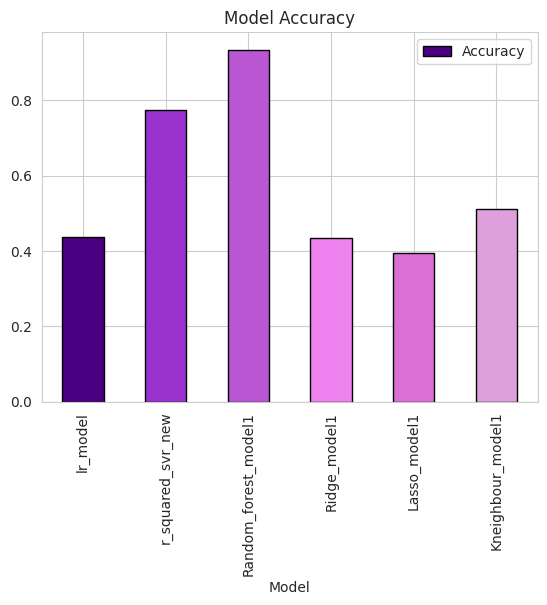

In [135]:
# MODEL WITH ACCURACY

colors = ["INDIGO", "DARKORCHID", "mediumorchid", "violet", "orchid", "plum"]
model_df.plot.bar(x='Model', y='Accuracy', color = colors, edgecolor ='black')

# Add title
plt.title('Model Accuracy')

# Show plot
plt.show()

In [105]:
accuracy_scores = [
    0.436179265423553,
    0.774379386683241,
    0.933772380303014,
    0.43526426180709765,
    0.39600790193257607,
    0.5110182249215818,
]

In [106]:
model_list_1 = ["lr_model", "r_squared_svr_new", "Random_forest_model1", "Ridge_model1", "Lasso_model1", "Kneighbour_model1"]

In [107]:
# CREATING NEW DATAFRAME OF MODEL WITH THEIR RESPECTIVE ACCURACY AFTER HYPERPARAMETER TUNING

model_df = pd.DataFrame({"Model": model_list_1, "Accuracy": accuracy_scores})
model_df

,Model,Accuracy
0,lr_model,0.436179
1,r_squared_svr_new,0.774379
2,Random_forest_model1,0.933772
3,Ridge_model1,0.435264
4,Lasso_model1,0.396008
5,Kneighbour_model1,0.511018


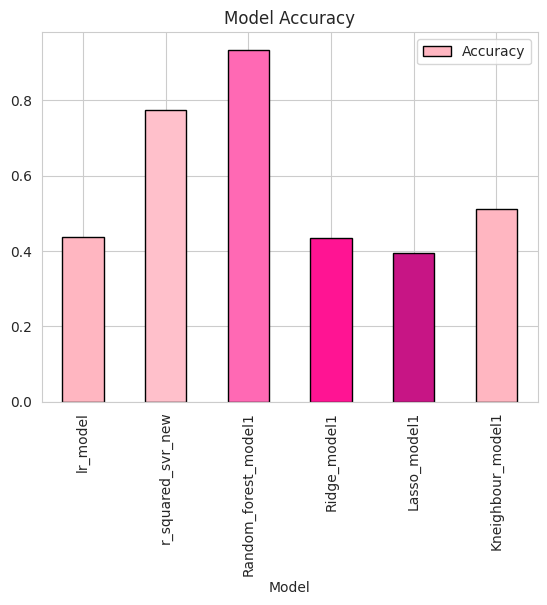

In [136]:
# MODEL WITH ACCURACY

colors = ['lightpink','pink','hotpink','deeppink','mediumvioletred',]
model_df.plot.bar(x='Model', y='Accuracy', color = colors, edgecolor = 'black')

# Add title
plt.title('Model Accuracy')

# Show plot
plt.show()


In [109]:
import pickle

In [110]:
# SAVE EACH MODEL TO A SEPARATE PICKLE FILE

models = [lr_model, r_squared_svr_new, Random_forest_model1, Ridge_model1, Lasso_model1, Kneighbour_model1]
model_names = ["lr_model", "r_squared_svr_new", "Random_forest_model1", "Ridge_model1", "Lasso_model1", "Kneighbour_model1"]

In [113]:
for model, model_name in zip(models, model_names):
    with open(model_name, 'wb') as f:
        pickle.dump(model, f)